<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Activation Functions in Neural Networks

This presentation covers various activation functions used in neural networks, their mathematical formulations, diagrammatic representations using Mermaid, and PyTorch implementations.

## Introduction to Activation Functions

Activation functions introduce non-linearities into the neural network, enabling it to learn complex patterns.

## Mathematical Formulations

Below is a table comparing several common activation functions along with their formulas and derivatives. In many cases, the derivatives are expressed in terms of the activation function itself for clarity.

| **Activation Function** | **Function Formula** | **Derivative** |
|-------------------------|----------------------|----------------|
| **Sigmoid**             | $ \sigma(x)=\frac{1}{1+e^{-x}} $ | $ \sigma'(x)=\sigma(x)\cdot(1-\sigma(x)) $ |
| **Tanh**                | $ \tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}} $ | $ \tanh'(x)=1-\tanh^2(x) $ |
| **ReLU**                | $ \text{ReLU}(x)=\max(0,x) $ | $ \text{ReLU}'(x)= \begin{cases} 1 & \text{if } x>0, \\ 0 & \text{if } x\leq0 \end{cases} $ |
| **Leaky ReLU**          | $ \text{LeakyReLU}(x)= \begin{cases} x & \text{if } x\geq0, \\ \alpha x & \text{if } x<0 \end{cases} $ (typically with $ \alpha=0.01 $) | $ \text{LeakyReLU}'(x)= \begin{cases} 1 & \text{if } x>0, \\ \alpha & \text{if } x<0 \end{cases} $ |

**Notes:**
- **Sigmoid & Softplus:** The derivative of the Softplus function is exactly the sigmoid function.
- **ReLU:** Although the derivative is not defined at $ x=0 $ mathematically, it is usually set to 0 or 1 in implementations.
- **Leaky ReLU & ELU:** The parameter $ \alpha $ is a small positive constant (often 0.01 or 1.0 for ELU) that can be tuned.


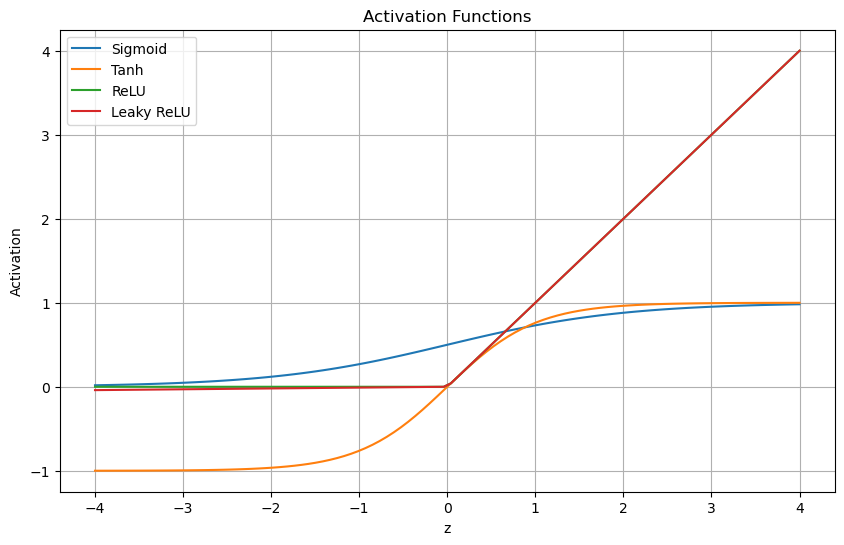

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def tanh(z):
    return torch.tanh(z)

def relu(z):
    return torch.relu(z)

def leaky_relu(z):
    return torch.nn.functional.leaky_relu(z, negative_slope=0.01)

# Generate input data
z = torch.linspace(-4, 4, 100)

# Compute activations
sig = sigmoid(z)
tanh_act = tanh(z)
relu_act = relu(z)
leakyrelu_act = leaky_relu(z)

# Plot activations
plt.figure(figsize=(10, 6))
plt.plot(z.numpy(), sig.numpy(), label='Sigmoid')
plt.plot(z.numpy(), tanh_act.numpy(), label='Tanh')
plt.plot(z.numpy(), relu_act.numpy(), label='ReLU')
plt.plot(z.numpy(), leakyrelu_act.numpy(), label='Leaky ReLU')
plt.title('Activation Functions')
plt.xlabel('z')
plt.ylabel('Activation')
plt.legend()
plt.grid(True)
plt.show()

## PyTorch Implementations

### Sigmoid Activation in PyTorch

```python
import torch.nn.functional as F

def sigmoid_activation(x):
    return F.sigmoid(x)
```

### ReLU Activation in PyTorch

```python
def relu_activation(x):
    return F.relu(x)
```

### Leaky ReLU Activation in PyTorch

```python
def leaky_relu_activation(x):
    return F.leaky_relu(x, negative_slope=0.01)
```

### ELU Activation in PyTorch

```python
def elu_activation(x, alpha=1.0):
    return F.elu(x, alpha=alpha)
```

### Softplus Activation in PyTorch

```python
def softplus_activation(x):
    return F.softplus(x)
```

### Swish Activation in PyTorch

```python
def swish_activation(x):
    return x * torch.sigmoid(x)
```

## Comparison and Use Cases

- **Sigmoid:** Useful for binary classification but suffers from vanishing gradients.
- **Tanh:** Zero-centered, helps with convergence but also suffers from vanishing gradients.
- **ReLU:** Computationally efficient, mitigates vanishing gradients, widely used in hidden layers.
- **Leaky ReLU:** Addresses the dying ReLU problem by allowing a small gradient when the unit is not active.
- **ELU:** Similar to ReLU but with a smoother curve for negative values, which can lead to faster convergence.
- **Softplus:** A smooth approximation to the ReLU function, useful in some specific scenarios.
- **Swish:** Combines a linear term and the sigmoid function, leading to a smooth and non-monotonic activation.

## Summary

- Activation functions introduce non-linearity into neural networks.
- Common activation functions include Sigmoid, Tanh, ReLU, Leaky ReLU, ELU, Softplus, and Swish.
- Each activation function has its advantages and use cases.
- PyTorch provides built-in functions for easy implementation.

Thank you for your attention!

Questions?